<IPython.core.display.Javascript object>


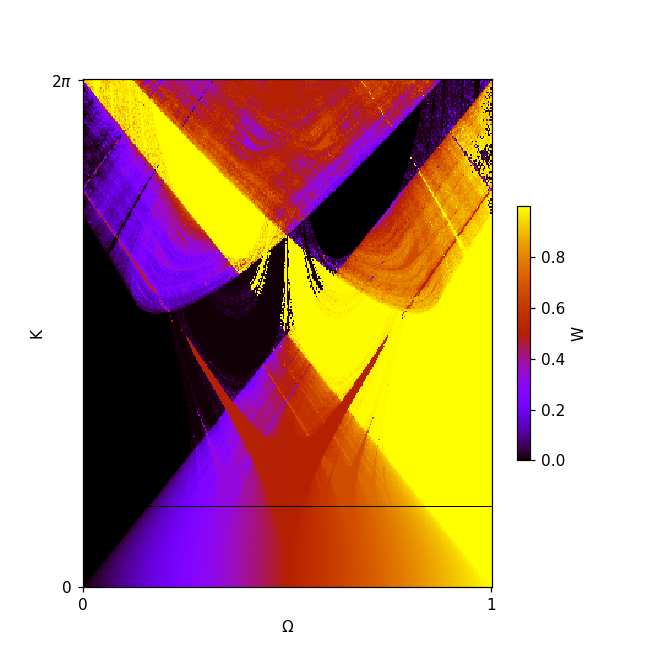

In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator


def circle(theta, omega, K):
    return (theta + omega -  K * np.sin(2 * np.pi * theta)) 

def wind(theta_o, omega, K):
    n = 0
    theta = theta_o
    nn = []    
    while n < 250:
        theta = circle(theta, omega, K)
        n += 1
    return (abs(theta - theta_o))/n % 1

def getwind(OMEGA, K, W, X, theta_o):
    for i in range(len(K)):
        for j in range(len(K[0])):
            k = K[i][j]
            omega = OMEGA[i][j]
            W[i][j] = wind(theta_o, omega, k)
    return W      
            
theta_o = .5

dx = .003
y = np.arange(0,1+dx,dx)
x = np.arange(0,1+dx,dx)
OMEGA, K = np.meshgrid(x,y)
W = OMEGA*0.0    
X = OMEGA*0

W = getwind(OMEGA, K, W, X, theta_o)


minW = np.min(W)
maxW = np.max(W)
KK=K*2*np.pi


row = len(K)

d = int(row/(2*np.pi))
W[d][:]=0


f, ax = plt.subplots(figsize=(6,6))
cc = ax.pcolormesh(OMEGA,KK,W, cmap ='gnuplot')

ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=2*np.pi))
ax.xaxis.set_major_locator(MultipleLocator(base=1))

cbar = f.colorbar(cc, ax=ax, shrink = .5)
plt.xlabel('$\Omega$')
plt.ylabel('K')
cbar.set_label('W')

plt.savefig('Weighting_Arnold.png')

<IPython.core.display.Javascript object>


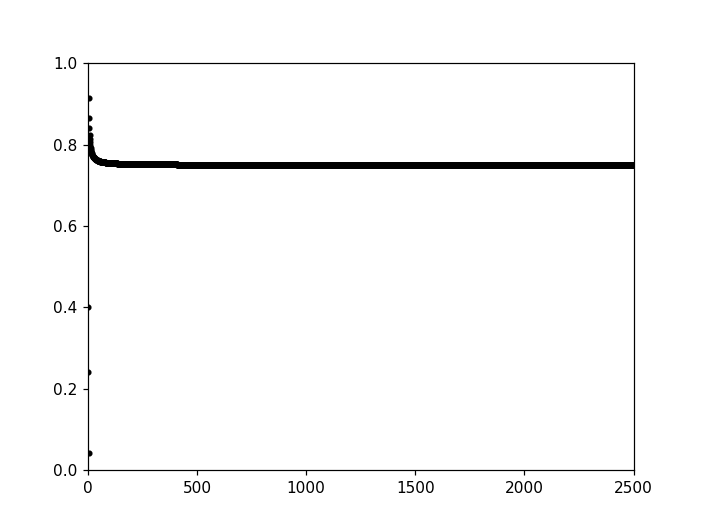

(0, 2500)

In [98]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator


def circle(theta, omega, K):
    return (theta + omega -  K * np.sin(2 * np.pi * theta)) % 1

def wind(theta_o, omega, K):
    n = 0
    theta = theta_o
    nn = []  
    thetas = []
    while n < 2500:
        theta = circle(theta, omega, K)
        thetas.append(theta)
        n += 1
    for i in range(len(thetas)):
        nn.append(i+1)    
    return nn, thetas


    return W      
            
theta_o = .5

dx = .001
y = np.arange(0,1+dx,dx)
x = np.arange(0,1+dx,dx)
OMEGA, K = np.meshgrid(x,y)
W = OMEGA*0.0    
X = OMEGA*0

nn, theta = wind(theta_o, .9, .1)




plt.plot(nn, np.array(theta), 'k.')
plt.ylim(0,1)
plt.xlim(0,len(nn))

#plt.savefig('theta_n.png')

In [41]:
plt.savefig('Weighting_Arnold.png')
